# Load From CSV

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [4]:
TRAIN_DATA_URL = 'https://storage.googleapis.com/tf-datasets/titanic/train.csv'
TEST_DATA_URL = 'https://storage.googleapis.com/tf-datasets/titanic/eval.csv'

In [5]:
train_file_path = tf.keras.utils.get_file("train.csv", TRAIN_DATA_URL) # Downloads file from URL
test_file_path = tf.keras.utils.get_file("test.csv", TEST_DATA_URL)

24576/13049 [========================================================] - 0s 0us/step


In [6]:
train_file_path, test_file_path

('/root/.keras/datasets/train.csv', '/root/.keras/datasets/test.csv')

In [7]:
LABEL_COLUMN = 'survived'

In [8]:
def get_dataset(file_path, **kwargs):
  dataset = tf.data.experimental.make_csv_dataset(
      file_path,
      batch_size=5,
      label_name = LABEL_COLUMN,
      na_value='?',
      num_epochs=1,
      ignore_errors=True,
      **kwargs)
  return dataset

In [9]:
raw_train_data = get_dataset(train_file_path)

In [10]:
raw_test_data = get_dataset(test_file_path)

In [11]:
raw_test_data

<PrefetchDataset shapes: (OrderedDict([(sex, (None,)), (age, (None,)), (n_siblings_spouses, (None,)), (parch, (None,)), (fare, (None,)), (class, (None,)), (deck, (None,)), (embark_town, (None,)), (alone, (None,))]), (None,)), types: (OrderedDict([(sex, tf.string), (age, tf.float32), (n_siblings_spouses, tf.int32), (parch, tf.int32), (fare, tf.float32), (class, tf.string), (deck, tf.string), (embark_town, tf.string), (alone, tf.string)]), tf.int32)>

In [12]:
type(raw_test_data)

tensorflow.python.data.ops.dataset_ops.PrefetchDataset

In [13]:
def show_batch(dataset):
  '''
  Helper function to look at one batch from dataset
  '''
  for batch, label in dataset.take(1):
    for key, value in batch.items():
      print(f'{key}, {value.numpy()}')


In [14]:
show_batch(raw_test_data)

sex, [b'male' b'female' b'male' b'male' b'male']
age, [21.  4. 16. 40. 28.]
n_siblings_spouses, [0 2 0 1 0]
parch, [0 1 0 1 0]
fare, [ 7.8   39.     7.775 15.5    0.   ]
class, [b'Third' b'Second' b'Third' b'Third' b'First']
deck, [b'unknown' b'F' b'unknown' b'unknown' b'unknown']
embark_town, [b'Southampton' b'Southampton' b'Southampton' b'Queenstown' b'Southampton']
alone, [b'y' b'n' b'y' b'n' b'y']


In [15]:
CSV_COLUMNS = ['survived', 'sex', 'age', 'n_siblings_spouses', 'parch', 'fare', 'class',
               'deck', 'embark_town', 'alone_1']

temp_dataset = get_dataset(train_file_path, column_names=CSV_COLUMNS) # column names can be specified manually
show_batch(temp_dataset)

sex, [b'male' b'female' b'male' b'male' b'male']
age, [40.5 21.  33.  28.  14. ]
n_siblings_spouses, [0 0 1 0 5]
parch, [0 0 1 0 2]
fare, [ 7.75   77.9583 20.525   7.8958 46.9   ]
class, [b'Third' b'First' b'Third' b'Third' b'Third']
deck, [b'unknown' b'D' b'unknown' b'unknown' b'unknown']
embark_town, [b'Queenstown' b'Southampton' b'Southampton' b'Cherbourg' b'Southampton']
alone_1, [b'y' b'y' b'n' b'y' b'n']


In [17]:
CSV_COLUMNS = ['survived', 'class',
               'deck', 'embark_town', 'alone']

temp_dataset = get_dataset(train_file_path, select_columns=CSV_COLUMNS) # Load only selected columns
show_batch(temp_dataset)

class, [b'Third' b'First' b'Third' b'First' b'Second']
deck, [b'unknown' b'E' b'unknown' b'B' b'unknown']
embark_town, [b'Queenstown' b'Southampton' b'Queenstown' b'Southampton' b'Southampton']
alone, [b'y' b'n' b'n' b'n' b'y']


# Load from Numpy and Pandas

In [18]:
# Load into Numpy
DATA_URL = 'https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz'
path = tf.keras.utils.get_file('mnist.npz', DATA_URL)

with np.load(path) as data:
  train_examples = data['x_train']
  train_labels = data['y_train']
  test_examples = data['x_test']
  test_labels = data['y_test']

11501568/11490434 [==============================] - 0s 0us/step


In [19]:
type(train_examples)

numpy.ndarray

In [20]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_examples, train_labels))
test_dataset = tf.data.Dataset.from_tensor_slices((test_examples, test_labels))

In [21]:
type(train_dataset)

tensorflow.python.data.ops.dataset_ops.TensorSliceDataset

In [24]:
for values in train_dataset.take(1):
  print(values[0].shape)

(28, 28)


In [28]:
# Load into pandas
df = pd.read_csv('heart.csv')
df.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
94,45,0,1,112,160,0,1,138,0,0.0,1,0,2,1
148,44,1,2,120,226,0,1,169,0,0.0,2,0,2,1
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
73,51,1,0,140,261,0,0,186,1,0.0,2,0,2,1


In [29]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [30]:
target = df['target']
features = df.drop(columns='target')

In [31]:
dataset = tf.data.Dataset.from_tensor_slices((features.values, target.values))

In [32]:
type(dataset)

tensorflow.python.data.ops.dataset_ops.TensorSliceDataset

# TFExample
* Key/Value relationship inside dictionary-like object

* Arranged with datatypes and nested for full dataset

In [33]:
n_observations = 10000

In [34]:
# Creating an artificial dataset
feature0 = np.random.choice([False, True], n_observations)
feature1 = np.random.randint(0, 5, n_observations)
strings = np.array([b'a', b'b', b'c', b'd', b'e'])
feature2 = strings[feature1]
feature3 = np.random.randn(n_observations)

features_dataset = tf.data.Dataset.from_tensor_slices(
    (feature0, feature1, feature2, feature3)
)

In [35]:
features_dataset

<TensorSliceDataset shapes: ((), (), (), ()), types: (tf.bool, tf.int64, tf.string, tf.float64)>

In [37]:
for f0, f1, f2, f3 in features_dataset.take(1):
  print(f0)
  print(f1)
  print(f2)
  print(f3)

tf.Tensor(True, shape=(), dtype=bool)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(b'e', shape=(), dtype=string)
tf.Tensor(-0.6945605392385341, shape=(), dtype=float64)


In [38]:
# Helper functions -- Also available in TF Docs

# copied from https://www.tensorflow.org/tutorials/load_data/tfrecord
# The following functions can be used to convert a value to a type compatible
# with tf.train.Example.

def _bytes_feature(value):
  """Returns a bytes_list from a string / byte."""
  if isinstance(value, type(tf.constant(0))):
    value = value.numpy() # BytesList won't unpack a string from an EagerTensor.
  return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

def _float_feature(value):
  """Returns a float_list from a float / double."""
  return tf.train.Feature(float_list=tf.train.FloatList(value=[value]))

def _int64_feature(value):
  """Returns an int64_list from a bool / enum / int / uint."""
  return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))

In [39]:
def serialize_example(feature0, feature1, feature2, feature3):

  """
  Creates a tf.train.Example message ready to be written to a file.
  """
  # Create a dictionary mapping the feature name to the tf.train.Example-compatible
  # data type.

  feature = {
      'feature0': _int64_feature(feature0),
      'feature1': _int64_feature(feature1),
      'feature2': _bytes_feature(feature2),
      'feature3': _float_feature(feature3),
  }

  # Create a Features message using tf.train.Example.
  example_proto = tf.train.Example(features=tf.train.Features(feature=feature))

  return example_proto.SerializeToString()

In [40]:
serialized_example = serialize_example(False, 4, b'c', 0.1234)
serialized_example

b'\nO\n\x14\n\x08feature3\x12\x08\x12\x06\n\x04$\xb9\xfc=\n\x11\n\x08feature1\x12\x05\x1a\x03\n\x01\x04\n\x11\n\x08feature2\x12\x05\n\x03\n\x01c\n\x11\n\x08feature0\x12\x05\x1a\x03\n\x01\x00'

In [41]:
example_returned = tf.train.Example.FromString(serialized_example)
print(example_returned)
print(type(example_returned))

features {
  feature {
    key: "feature0"
    value {
      int64_list {
        value: 0
      }
    }
  }
  feature {
    key: "feature1"
    value {
      int64_list {
        value: 4
      }
    }
  }
  feature {
    key: "feature2"
    value {
      bytes_list {
        value: "c"
      }
    }
  }
  feature {
    key: "feature3"
    value {
      float_list {
        value: 0.1234000027179718
      }
    }
  }
}

<class 'tensorflow.core.example.example_pb2.Example'>


# TFRecord
* Simple format for storing a sequence of binary records.
* Efficiently reads data linearly from disk.
* This format is especially beneficial if streamed over a network.

<em><ins>Note:</ins> TFRecord adds complexity. Only use if bottleneck in training is loading data.</em>

In [42]:
# saving and loading data from tf.example using TFRecord

def tf_serialize_example(f0,f1,f2,f3):
  tf_string = tf.py_function(
    serialize_example,
    (f0, f1, f2, f3),  # Pass these args to the above function.
    tf.string)      # The return type is `tf.string`.
  return tf.reshape(tf_string, ()) # The result is a scalar.

In [43]:
# serialize entire dataset

serialized_features_dataset = features_dataset.map(tf_serialize_example)
serialized_features_dataset

<MapDataset shapes: (), types: tf.string>

In [44]:
# Alternate way to serialize the dataset
def generator():
  for features in features_dataset:
    yield serialize_example(*features)

serialized_features_dataset = tf.data.Dataset.from_generator(
    generator, output_types=tf.string, output_shapes=())

serialized_features_dataset

<FlatMapDataset shapes: (), types: tf.string>

In [49]:
!rm dataset.tfrecord
filename = 'dataset.tfrecord'
writer = tf.data.experimental.TFRecordWriter(filename)
writer.write(serialized_features_dataset)

In [50]:
# Reading a TFRecord File
filenames = [filename]
raw_dataset = tf.data.TFRecordDataset(filenames)
raw_dataset

<TFRecordDatasetV2 shapes: (), types: tf.string>

In [51]:
for raw_record in raw_dataset.take(10):
  print(repr(raw_record))

<tf.Tensor: shape=(), dtype=string, numpy=b'\nO\n\x14\n\x08feature3\x12\x08\x12\x06\n\x04\xb8\xce1\xbf\n\x11\n\x08feature2\x12\x05\n\x03\n\x01e\n\x11\n\x08feature0\x12\x05\x1a\x03\n\x01\x01\n\x11\n\x08feature1\x12\x05\x1a\x03\n\x01\x04'>
<tf.Tensor: shape=(), dtype=string, numpy=b'\nO\n\x11\n\x08feature1\x12\x05\x1a\x03\n\x01\x04\n\x14\n\x08feature3\x12\x08\x12\x06\n\x04\xa0\r\xa6?\n\x11\n\x08feature0\x12\x05\x1a\x03\n\x01\x01\n\x11\n\x08feature2\x12\x05\n\x03\n\x01e'>
<tf.Tensor: shape=(), dtype=string, numpy=b'\nO\n\x11\n\x08feature1\x12\x05\x1a\x03\n\x01\x01\n\x11\n\x08feature0\x12\x05\x1a\x03\n\x01\x00\n\x11\n\x08feature2\x12\x05\n\x03\n\x01b\n\x14\n\x08feature3\x12\x08\x12\x06\n\x04!\x9d1@'>
<tf.Tensor: shape=(), dtype=string, numpy=b'\nO\n\x11\n\x08feature0\x12\x05\x1a\x03\n\x01\x00\n\x11\n\x08feature2\x12\x05\n\x03\n\x01a\n\x14\n\x08feature3\x12\x08\x12\x06\n\x04\x15W\x02@\n\x11\n\x08feature1\x12\x05\x1a\x03\n\x01\x00'>
<tf.Tensor: shape=(), dtype=string, numpy=b'\nO\n\x11\n\x08

In [52]:
# Create a description of the features.
feature_description = {
    'feature0': tf.io.FixedLenFeature([], tf.int64, default_value=0),
    'feature1': tf.io.FixedLenFeature([], tf.int64, default_value=0),
    'feature2': tf.io.FixedLenFeature([], tf.string, default_value=''),
    'feature3': tf.io.FixedLenFeature([], tf.float32, default_value=0.0),
}

def _parse_function(example_proto):
  # Parse the input `tf.train.Example` proto using the dictionary above.
  return tf.io.parse_single_example(example_proto, feature_description)

In [53]:
parsed_dataset = raw_dataset.map(_parse_function)
parsed_dataset

<MapDataset shapes: {feature0: (), feature1: (), feature2: (), feature3: ()}, types: {feature0: tf.int64, feature1: tf.int64, feature2: tf.string, feature3: tf.float32}>

In [61]:
for parsed_record in parsed_dataset.take(1):
  for k, v in parsed_record.items():
    print(k, ': ', v)

feature0 :  tf.Tensor(1, shape=(), dtype=int64)
feature1 :  tf.Tensor(4, shape=(), dtype=int64)
feature2 :  tf.Tensor(b'e', shape=(), dtype=string)
feature3 :  tf.Tensor(-0.6945605, shape=(), dtype=float32)


# Load Image Data

In [62]:
import matplotlib.pyplot as plt
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [63]:
train_images.shape

(60000, 28, 28)

In [64]:
def plot_image(image):
  plt.figure()
  plt.imshow(image, cmap='gray')
  plt.axis('off')
  plt.grid(False)
  plt.show();

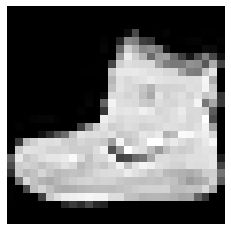

In [65]:
plot_image(train_images[0])

In [66]:
train_images = train_images / 255.
test_images = test_images / 255.